In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from matplotlib.patches import Circle, Rectangle, Arc

In [2]:
data = pd.read_csv("data/nba_players_stats_2223.csv")

In [3]:
data

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,achiupr01
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,adamsst01
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,adebaba01
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,agbajoc01
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,aldamsa01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4,youngth01
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2,youngtr01
676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4,yurtsom01
677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5,zelleco01


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
data = data.fillna(0)

In [6]:
positions = pd.unique(data["Pos"])
teams = pd.unique(data["Tm"])

In [7]:
def scale_data(df) :
    numeric_data = df.drop(columns = ["Rk", "Player", "Pos", "Age", "Tm", "Player-additional"])
    new_cols = [x for x in list(df.columns) if x not in ["Rk", "Player", "Pos", "Age", "Tm", "Player-additional"]]
    scaler = MinMaxScaler()
    #scaler.fit(numeric_data)
    X_scaled = scaler.fit_transform(numeric_data)
    X_scaled = pd.DataFrame(X_scaled, index=df["Player"])
    X_scaled.columns = new_cols
    return X_scaled

In [8]:
def plot_pca(data) :
    pca = PCA(n_components=25, random_state=2020)
    pca.fit(data)
    X_pca = pca.transform(data)
    X_pca = pd.DataFrame(X_pca, index = list(data.index))
    plt.figure(figsize=(15,15))
    for i, j, k in zip(X_pca[0], X_pca[1], X_pca.index) :
        plt.text(i,j,k, size = 150)
    return plt.show()

Nous venons de créer deux fonctions, une première pour standardiser nos données et la deuxième pour représenter les individus selon les deux premiers axes de l'ACP. Avant de faire une première représentation des individus, nous allons regarder l'histogramme du nombre de matchs joués. Grâce à cela, nous pourrons sélectionner seulement les joueurs ayant joué un certians nombre de matchs. Cela nous permettra d'avoir des résultats plus pertinents.

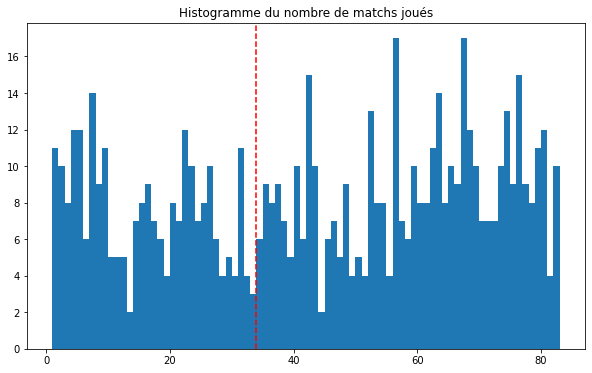

In [9]:
plt.figure(figsize=(10,6))
plt.title("Histogramme du nombre de matchs joués")
plt.hist(data["G"], bins = 82)
plt.axvline(34, c = "red", linestyle = "--")
plt.show()

Nous allons donc sélectionner les joeurs ayant joués plus de 33 matchs lors de la saison régulière 2022/2023.

In [66]:
data_33 = data[data["G"]>33]

In [11]:
data_33_s = scale_data(data_33)

In [12]:
#plot_pca(data_33_s)

Grâce à cette première ACP, on peut voir plusieurs groupes de joueurs se dégager :
- Les pivots jouant principalement à l'intérieur (Rudy Gobert, Mitchell Robinson, Robert Williams...)
- Les intérieurs pouvant jouer à l'extérieur (Anthony Davis, Nikola Jokic, Joel Embiid...)
- Les postes 3 scoreur (Jimmy Butler, KD, Jason Tatum, DeMar DeRozan...)
- Les arrières scoreur (Damian Lilliard, Trae Young, Klay Thompson, Stephen Curry...)

# K means

In [13]:
def Kmeans_clustering(data, clusters) :
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(data)
    labels = kmeans.predict(data)
    dico_group_kmeans = {}
    for i in labels :
        dico_group_kmeans[i] = []
    for player, group in zip(data.index, labels) :
        dico_group_kmeans[group].append(player)
    return dico_group_kmeans

In [14]:
dico_group_kmeans = Kmeans_clustering(data_33_s, 10)

In [15]:
for key, val in dico_group_kmeans.items() :
    print("---- {} ----".format(key))
    for i in val :
        print(i)

---- 5 ----
Precious Achiuwa
Marvin Bagley III
Bol Bol
Chris Boucher
Thomas Bryant
Thomas Bryant
Brandon Clarke
Zach Collins
Hamidou Diallo
Andre Drummond
Tari Eason
Drew Eubanks
Josh Green
Isaiah Hartenstein
Isaiah Jackson
Jonathan Kuminga
Kenyon Martin Jr.
Larry Nance Jr.
Onyeka Okongwu
Bobby Portis
Naz Reid
Nick Richards
Jalen Smith
Xavier Tillman Sr.
Jarred Vanderbilt
Moritz Wagner
Trendon Watford
Kenrich Williams
Mark Williams
James Wiseman
Christian Wood
---- 7 ----
Steven Adams
Jarrett Allen
Deandre Ayton
Clint Capela
Nic Claxton
Jalen Duren
Daniel Gafford
Rudy Gobert
Walker Kessler
Kevon Looney
Evan Mobley
Jusuf Nurkić
Mason Plumlee
Mason Plumlee
Jakob Poeltl
Jakob Poeltl
Dwight Powell
Mitchell Robinson
Alperen Şengün
Ben Simmons
Jonas Valančiūnas
Jarred Vanderbilt
Robert Williams
Ivica Zubac
---- 4 ----
Bam Adebayo
Giannis Antetokounmpo
Paolo Banchero
Devin Booker
Jaylen Brown
Jimmy Butler
Anthony Davis
DeMar DeRozan
Luka Dončić
Kevin Durant
Kevin Durant
Joel Embiid
Shai Gilge

Maintenant que nous avons ces 10 groupes, nous allons regarder les statistiques pour chacun d'entre eux et allons essayer d'identifier les groupes.

In [67]:
dico_df_groups = {}
for key, val in dico_group_kmeans.items() :
    df = data_33[data_33["Player"].isin(val)]
    dico_df_groups[key] = df

In [68]:
dico_df_groups

{5:       Rk              Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  \
 0      1    Precious Achiuwa   C   23  TOR  55  12  20.7  3.6   7.3  0.485   
 22    19   Marvin Bagley III   C   23  DET  42  25  23.6  4.8   9.1  0.529   
 64    47             Bol Bol  PF   23  ORL  70  33  21.5  3.7   6.8  0.546   
 68    51       Chris Boucher  PF   30  TOR  76   0  20.0  3.4   7.0  0.493   
 93    70       Thomas Bryant   C   25  TOT  59  26  18.3  3.9   6.3  0.623   
 94    70       Thomas Bryant   C   25  LAL  41  25  21.4  4.8   7.3  0.654   
 121   92      Brandon Clarke  PF   26  MEM  56   8  19.5  4.1   6.2  0.656   
 126   97        Zach Collins   C   25  SAS  63  26  22.9  4.5   8.7  0.518   
 153  120      Hamidou Diallo  SG   24  DET  56   0  17.8  3.8   6.7  0.573   
 170  133      Andre Drummond   C   29  CHI  67   0  12.7  2.5   4.1  0.606   
 178  139          Tari Eason  PF   21  HOU  82   5  21.5  3.6   8.0  0.448   
 185  144        Drew Eubanks   C   25  POR  78  

La première chose que nous pouvons faire pour mieux visualiser les groupes est de représenter les pourcentages de chaque position au sein de ceux ci :

In [18]:
for key, val in dico_df_groups.items() :
    print("--------- Groupe {} ---------".format(key))
    dico_pos = {}
    positions = pd.unique(val["Pos"])
    for i in positions :
        dico_pos[i] = len(val[val["Pos"]==i])
    print(list(val["Player"]))
    print(dico_pos)

--------- Groupe 5 ---------
['Precious Achiuwa', 'Marvin Bagley III', 'Bol Bol', 'Chris Boucher', 'Thomas Bryant', 'Thomas Bryant', 'Brandon Clarke', 'Zach Collins', 'Hamidou Diallo', 'Andre Drummond', 'Tari Eason', 'Drew Eubanks', 'Josh Green', 'Isaiah Hartenstein', 'Isaiah Jackson', 'Jonathan Kuminga', 'Kenyon Martin Jr.', 'Larry Nance Jr.', 'Onyeka Okongwu', 'Bobby Portis', 'Naz Reid', 'Nick Richards', 'Jalen Smith', 'Xavier Tillman Sr.', 'Jarred Vanderbilt', 'Jarred Vanderbilt', 'Moritz Wagner', 'Trendon Watford', 'Kenrich Williams', 'Mark Williams', 'James Wiseman', 'Christian Wood']
{'C': 16, 'PF': 13, 'SG': 2, 'SF': 1}
--------- Groupe 7 ---------
['Steven Adams', 'Jarrett Allen', 'Deandre Ayton', 'Clint Capela', 'Nic Claxton', 'Jalen Duren', 'Daniel Gafford', 'Rudy Gobert', 'Walker Kessler', 'Kevon Looney', 'Evan Mobley', 'Jusuf Nurkić', 'Mason Plumlee', 'Mason Plumlee', 'Jakob Poeltl', 'Jakob Poeltl', 'Dwight Powell', 'Mitchell Robinson', 'Alperen Şengün', 'Ben Simmons', 'Jon

In [19]:
0 // 3

0

In [20]:
def barplots_stats(group) :
    group_test = dico_df_groups[group]
        
    fig, ax = plt.subplots(2, 3, sharex=True, figsize=(12,8))
    k = 0
    x = -1
    y = 0
    for i, j in zip(["3P%", "PTS", "AST", "TRB", "FG%", "STL"], range(6)) :
        if j % 3 == 0 :
            x += 1
            y = 0
        else :
            y += 1
        ax[x,y].bar(np.arange(1), np.mean(group_test[i]), label = "groupe {}".format(group), color = "#FA5555", width = 0.2, edgecolor='white')
        ax[x,y].bar(np.arange(1)+0.3, np.mean(data_33[i]), label = "Moyenne globale", color = "#79B1FE", width = 0.2, edgecolor='white')
        ax[x,y].set_xlim(-0.2, 0.5)
        ax[x,y].set_title(i, fontsize = 16, fontweight='bold')
        ax[x,y].spines['top'].set_visible(False)
        ax[x,y].spines['right'].set_visible(False)
        
    plt.show()

In [60]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court
    
    parquet = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color="#FCCF99", fill=True)

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [parquet, hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
    ax.axis('off')
    return ax

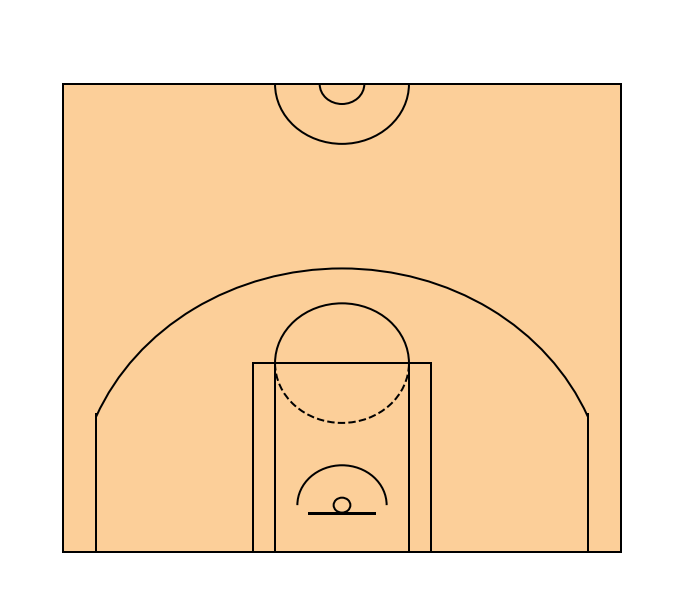

In [61]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

In [51]:
def plot_positions(group) :
    pos = {"PG" : [-100,230], "SG" : [100,230], "SF" : [200,100], "PF" : [-150,0], "C" : [0,0]}
    df_group = dico_df_groups[group]
    positions = [i for i in df_group["Pos"] if "-" not in i]
    dico_pos = {}
    for i in positions :
        dico_pos[i] = [pos[i],0]
    for i in df_group["Pos"] :
        if "-" not in i :
            dico_pos[i][1] += 1
        else :
            dico_pos[i.split("-")[0]][1] += 1
    plt.figure(figsize=(5,5))
    draw_court(outer_lines=True)
    plt.xlim(-300,300)
    plt.ylim(-100,500)
    for key, val in dico_pos.items() :
        plt.scatter(val[0][0], val[0][1], s = (val[1]/sum([i[1] for i in dico_pos.values()]))*1000, color = "#FA5555")
    plt.show()

In [52]:
dic = {"A": 3, "B" : 4}
print(sum(dic.values()))

7


87.16119953207836
--------- Groupe 5 ---------
['Precious Achiuwa', 'Marvin Bagley III', 'Bol Bol', 'Chris Boucher', 'Thomas Bryant', 'Thomas Bryant', 'Brandon Clarke', 'Zach Collins', 'Hamidou Diallo', 'Andre Drummond', 'Tari Eason', 'Drew Eubanks', 'Josh Green', 'Isaiah Hartenstein', 'Isaiah Jackson', 'Jonathan Kuminga', 'Kenyon Martin Jr.', 'Larry Nance Jr.', 'Onyeka Okongwu', 'Bobby Portis', 'Naz Reid', 'Nick Richards', 'Jalen Smith', 'Xavier Tillman Sr.', 'Jarred Vanderbilt', 'Jarred Vanderbilt', 'Moritz Wagner', 'Trendon Watford', 'Kenrich Williams', 'Mark Williams', 'James Wiseman', 'Christian Wood']
--------- Équipes ---------
{'TOR': 2, 'DET': 2, 'ORL': 2, 'TOT': 3, 'LAL': 1, 'MEM': 2, 'SAS': 1, 'CHI': 1, 'HOU': 2, 'POR': 2, 'DAL': 2, 'NYK': 1, 'IND': 2, 'GSW': 1, 'NOP': 1, 'ATL': 1, 'MIL': 1, 'MIN': 1, 'CHO': 2, 'UTA': 1, 'OKC': 1}
--------- Age ---------
24.09375
--------- Minutes jouées ---------
20.956249999999997
--------- Match commencé ---------
19.28125
--------- Stati

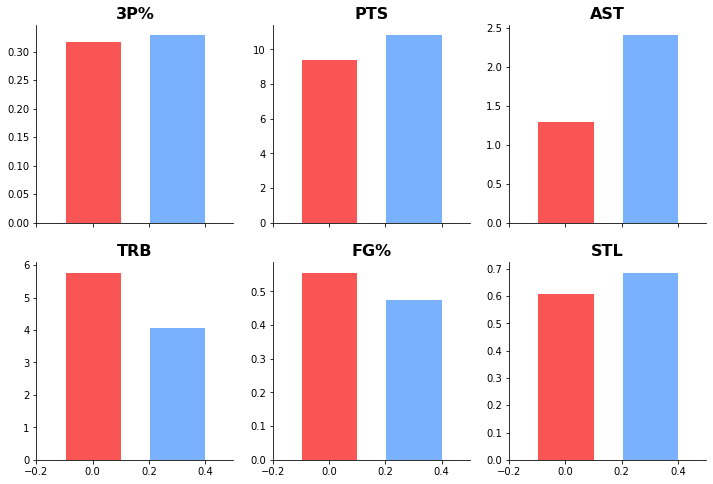

--------- Positions ---------


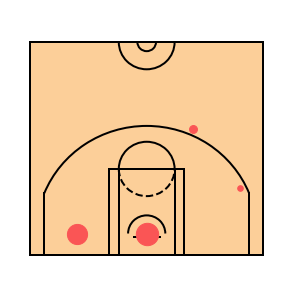

{'C': 16, 'PF': 13, 'SG': 2, 'SF': 1}
101.36366953572728
--------- Groupe 7 ---------
['Steven Adams', 'Jarrett Allen', 'Deandre Ayton', 'Clint Capela', 'Nic Claxton', 'Jalen Duren', 'Daniel Gafford', 'Rudy Gobert', 'Walker Kessler', 'Kevon Looney', 'Evan Mobley', 'Jusuf Nurkić', 'Mason Plumlee', 'Mason Plumlee', 'Jakob Poeltl', 'Jakob Poeltl', 'Dwight Powell', 'Mitchell Robinson', 'Alperen Şengün', 'Ben Simmons', 'Jonas Valančiūnas', 'Jarred Vanderbilt', 'Jarred Vanderbilt', 'Robert Williams', 'Ivica Zubac']
--------- Équipes ---------
{'MEM': 1, 'CLE': 2, 'PHO': 1, 'ATL': 1, 'BRK': 2, 'DET': 1, 'WAS': 1, 'MIN': 1, 'UTA': 2, 'GSW': 1, 'POR': 1, 'TOT': 3, 'CHO': 1, 'SAS': 1, 'DAL': 1, 'NYK': 1, 'HOU': 1, 'NOP': 1, 'BOS': 1, 'LAC': 1}
--------- Age ---------
25.68
--------- Minutes jouées ---------
26.58
--------- Match commencé ---------
57.84
--------- Statistiques ---------


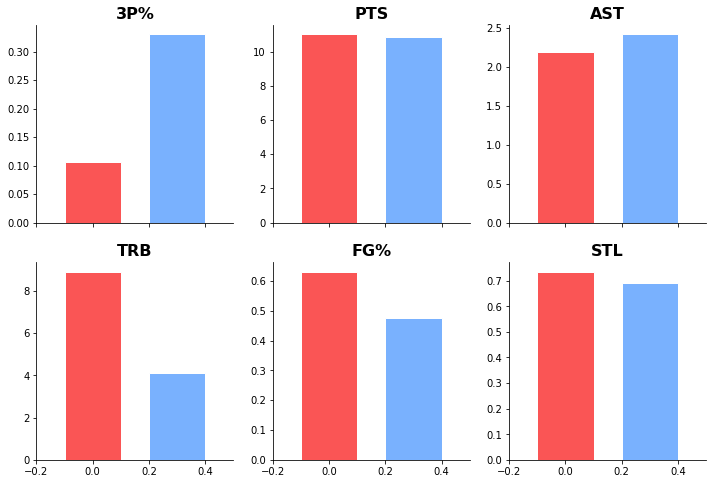

--------- Positions ---------


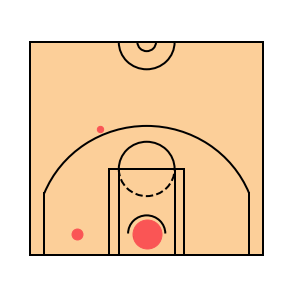

{'C': 21, 'PF': 3, 'PG': 1}
243.13786516130418
--------- Groupe 4 ---------
['Bam Adebayo', 'Giannis Antetokounmpo', 'Paolo Banchero', 'Devin Booker', 'Jaylen Brown', 'Jimmy Butler', 'Anthony Davis', 'DeMar DeRozan', 'Luka Dončić', 'Kevin Durant', 'Kevin Durant', 'Joel Embiid', 'Shai Gilgeous-Alexander', 'Brandon Ingram', 'LeBron James', 'Nikola Jokić', 'Ja Morant', 'Kristaps Porziņģis', 'Julius Randle', 'Domantas Sabonis', 'Pascal Siakam', 'Jayson Tatum']
--------- Équipes ---------
{'MIA': 2, 'MIL': 1, 'ORL': 1, 'PHO': 1, 'BOS': 2, 'LAL': 2, 'CHI': 1, 'DAL': 1, 'TOT': 1, 'BRK': 1, 'PHI': 1, 'OKC': 1, 'NOP': 1, 'DEN': 1, 'MEM': 1, 'WAS': 1, 'NYK': 1, 'SAC': 1, 'TOR': 1}
--------- Age ---------
27.681818181818183
--------- Minutes jouées ---------
34.76363636363636
--------- Match commencé ---------
63.68181818181818
--------- Statistiques ---------


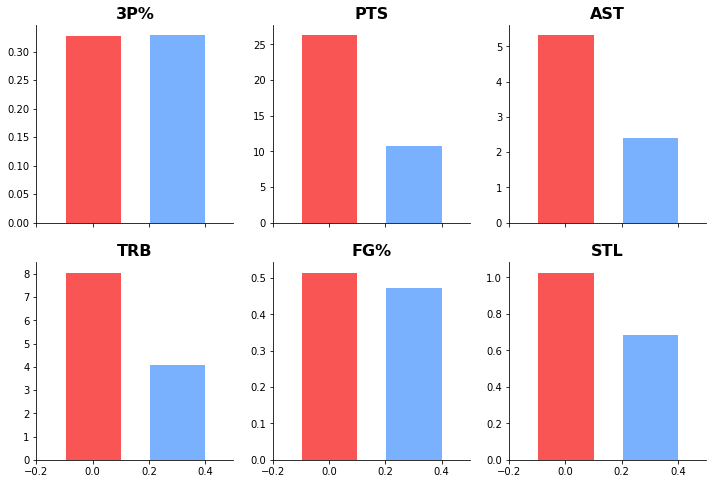

--------- Positions ---------


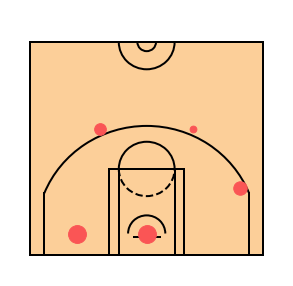

{'C': 7, 'PF': 6, 'SG': 1, 'SF': 4, 'PG': 3, 'PF-SF': 1}
65.82638662164435
--------- Groupe 1 ---------
['Ochai Agbaji', 'Santi Aldama', 'Nickeil Alexander-Walker', 'Nickeil Alexander-Walker', 'Keita Bates-Diop', 'Nicolas Batum', 'Malaki Branham', 'Christian Braun', 'Oshae Brissett', 'Vlatko Čančar', 'Josh Christopher', 'Pat Connaughton', 'Seth Curry', 'Dyson Daniels', 'Terence Davis', 'Usman Garuba', 'Jordan Goodwin', "Devonte' Graham", "Devonte' Graham", 'Jeff Green', 'AJ Griffin', 'Rui Hachimura', 'Joe Harris', 'Sam Hauser', 'Isaiah Joe', 'Jalen Johnson', 'Derrick Jones Jr.', 'Tyus Jones', 'Cory Joseph', 'Luke Kennard', 'Luke Kennard', 'Kevin Knox', 'Kevin Knox', 'John Konchar', 'Anthony Lamb', 'Jock Landale', 'Damion Lee', 'Isaiah Livers', 'Kevin Love', 'Kevin Love', 'Trey Lyles', 'Tre Mann', 'Naji Marshall', 'T.J. McConnell', 'Doug McDermott', 'Shake Milton', 'Davion Mitchell', 'Moses Moody', 'Mike Muscala', 'Mike Muscala', 'Georges Niang', 'Jaylen Nowell', 'Kendrick Nunn', 'Kendr

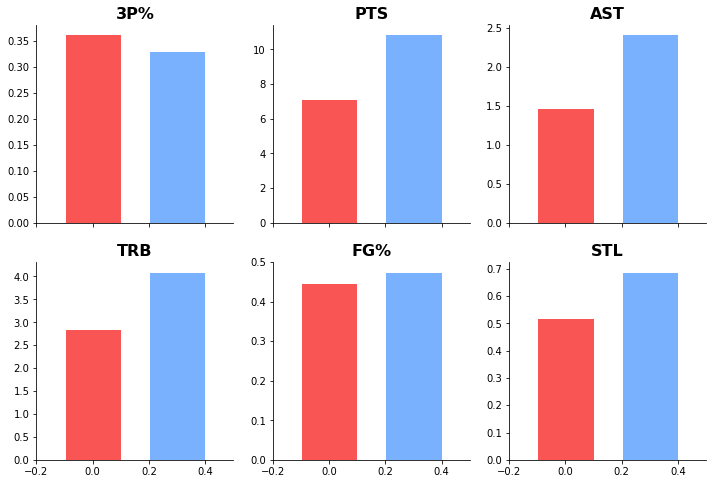

--------- Positions ---------


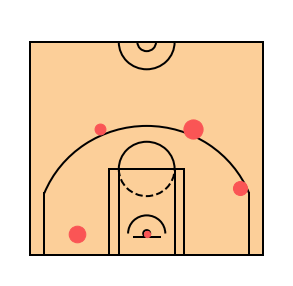

{'SG': 27, 'PF': 20, 'SF': 15, 'PG': 9, 'PF-SF': 1, 'C': 3, 'SG-PG': 1}
48.189486788726946
--------- Groupe 2 ---------
['Nickeil Alexander-Walker', 'Nickeil Alexander-Walker', 'Thanasis Antetokounmpo', 'Will Barton', 'Will Barton', 'Darius Bazley', 'Darius Bazley', 'MarJon Beauchamp', 'Dāvis Bertāns', 'James Bouknight', 'Kennedy Chandler', 'Max Christie', 'Amir Coffey', 'Robert Covington', 'Ousmane Dieng', 'Goran Dragić', 'Goran Dragić', 'Chris Duarte', 'Kessler Edwards', 'Malachi Flynn', 'Simone Fontecchio', 'Rudy Gay', "Devonte' Graham", "Devonte' Graham", 'A.J. Green', 'R.J. Hampton', 'Jaden Hardy', 'Kevon Harris', 'Juancho Hernangómez', 'Haywood Highsmith', 'George Hill', 'George Hill', 'Aaron Holiday', 'Justin Holiday', 'Danuel House Jr.', 'Caleb Houstan', 'Joe Ingles', 'Ty Jerome', 'Keon Johnson', 'Frank Kaminsky', 'Luke Kennard', 'Luke Kennard', 'Maxi Kleber', 'Kevin Knox', 'Kevin Knox', 'Furkan Korkmaz', 'Romeo Langford', 'Jake LaRavia', 'Nassir Little', 'Kevin Love', 'Kevin L

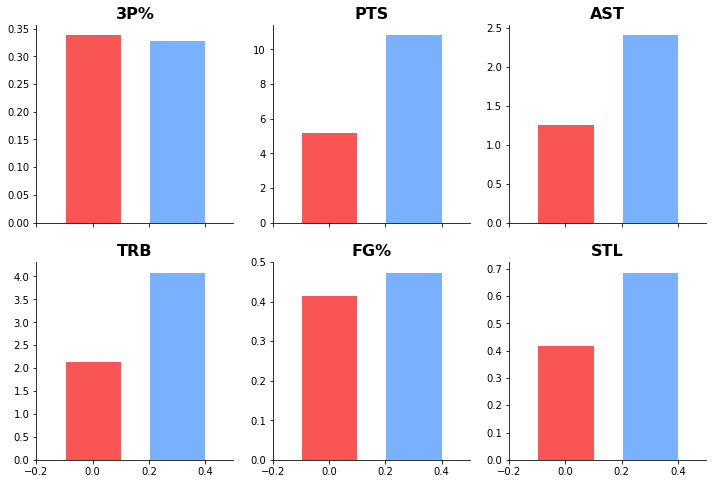

--------- Positions ---------


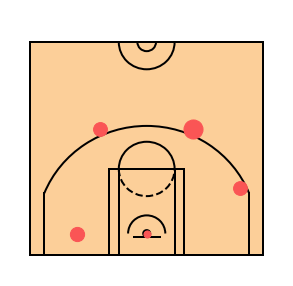

{'SG': 35, 'SF': 19, 'PF': 18, 'PG': 19, 'C': 5, 'PF-SF': 2, 'SG-PG': 1}
97.82840966274823
--------- Groupe 8 ---------
['Grayson Allen', 'Deni Avdija', 'Harrison Barnes', 'Malik Beasley', 'Malik Beasley', 'Patrick Beverley', 'Patrick Beverley', 'Saddiq Bey', 'Saddiq Bey', 'Bruce Brown', 'Troy Brown Jr.', 'Reggie Bullock', 'Kentavious Caldwell-Pope', 'Jevon Carter', 'Alex Caruso', 'Mike Conley', 'Mike Conley', 'Torrey Craig', 'Donte DiVincenzo', 'Ayo Dosunmu', 'Dorian Finney-Smith', 'Dorian Finney-Smith', 'Eric Gordon', 'Eric Gordon', 'Quentin Grimes', 'Tim Hardaway Jr.', 'Buddy Hield', 'Al Horford', 'Kevin Huerter', 'Reggie Jackson', 'Reggie Jackson', 'Corey Kispert', 'Caris LeVert', 'Terance Mann', 'Caleb Martin', 'Jalen McDaniels', 'Jalen McDaniels', "De'Anthony Melton", 'Marcus Morris', 'Monte Morris', 'Trey Murphy III', 'Keegan Murray', 'Andrew Nembhard', 'Aaron Nesmith', "Royce O'Neale", 'Isaac Okoro', 'Michael Porter Jr.', 'Immanuel Quickley', 'Max Strus', 'P.J. Tucker', 'Gabe V

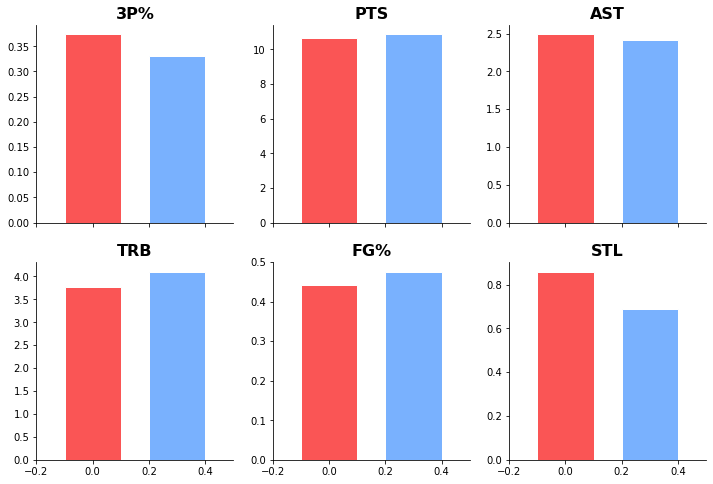

--------- Positions ---------


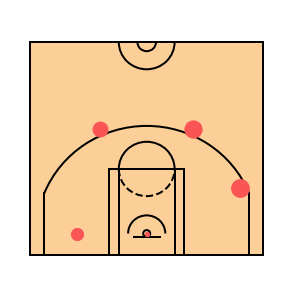

{'SG': 16, 'SF': 17, 'PF': 8, 'PG': 12, 'C': 1}
111.12434265599175
--------- Groupe 6 ---------
['Jose Alvarado', 'Cole Anthony', 'Malik Beasley', 'Malik Beasley', 'Patrick Beverley', 'Patrick Beverley', 'Saddiq Bey', 'Saddiq Bey', 'Bogdan Bogdanović', 'Malcolm Brogdon', 'Alec Burks', 'Mike Conley', 'Mike Conley', 'Dorian Finney-Smith', 'Dorian Finney-Smith', 'Eric Gordon', 'Eric Gordon', 'Gary Harris', 'Gordon Hayward', 'Talen Horton-Tucker', 'Bones Hyland', 'Bones Hyland', 'Reggie Jackson', 'Reggie Jackson', 'Cameron Johnson', 'Kyle Lowry', 'Bennedict Mathurin', 'Jalen McDaniels', 'Jalen McDaniels', 'Malik Monk', 'Victor Oladipo', 'Cameron Payne', 'Aleksej Pokusevski', 'Norman Powell', 'Austin Reaves', 'Cam Reddish', 'Josh Richardson', 'Josh Richardson', 'Dennis Schröder', 'Collin Sexton', 'Dennis Smith Jr.', 'Jalen Suggs', 'Gary Trent Jr.', 'Devin Vassell', 'Lonnie Walker IV', 'John Wall', 'Russell Westbrook', 'Russell Westbrook', 'Andrew Wiggins', 'Delon Wright']
--------- Équipes 

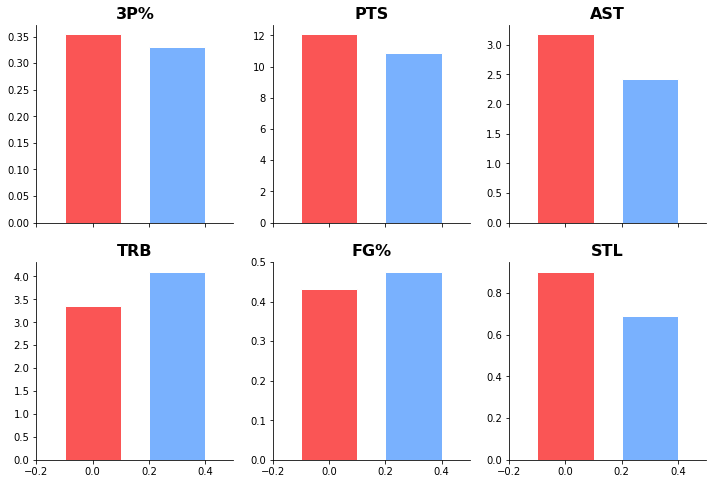

--------- Positions ---------


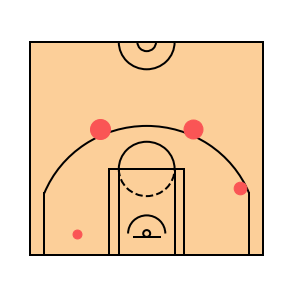

{'PG': 20, 'SG': 18, 'SF': 8, 'PF': 4}
130.55709125167576
--------- Groupe 9 ---------
['Kyle Anderson', 'OG Anunoby', 'Scottie Barnes', 'Mikal Bridges', 'Mikal Bridges', 'Dillon Brooks', 'Wendell Carter Jr.', 'John Collins', 'Luguentz Dort', 'Markelle Fultz', 'Josh Giddey', 'Aaron Gordon', 'Draymond Green', 'Tobias Harris', 'Josh Hart', 'Josh Hart', 'Killian Hayes', "De'Andre Hunter", 'Jaden Ivey', 'Jaren Jackson Jr.', 'Herbert Jones', 'Tre Jones', 'Brook Lopez', 'Jaden McDaniels', 'Kelly Olynyk', 'Chris Paul', 'Marcus Smart', 'Jabari Smith Jr.', 'Jeremy Sochan', 'Isaiah Stewart', 'Myles Turner', 'Nikola Vučević', 'Franz Wagner', 'P.J. Washington', 'Russell Westbrook', 'Russell Westbrook', 'Jalen Williams']
--------- Équipes ---------
{'MIN': 2, 'TOR': 2, 'TOT': 3, 'PHO': 2, 'MEM': 2, 'ORL': 3, 'ATL': 2, 'OKC': 3, 'DEN': 1, 'GSW': 1, 'PHI': 1, 'POR': 1, 'DET': 3, 'NOP': 1, 'SAS': 2, 'MIL': 1, 'UTA': 1, 'BOS': 1, 'HOU': 1, 'IND': 1, 'CHI': 1, 'CHO': 1, 'LAL': 1}
--------- Age ---------

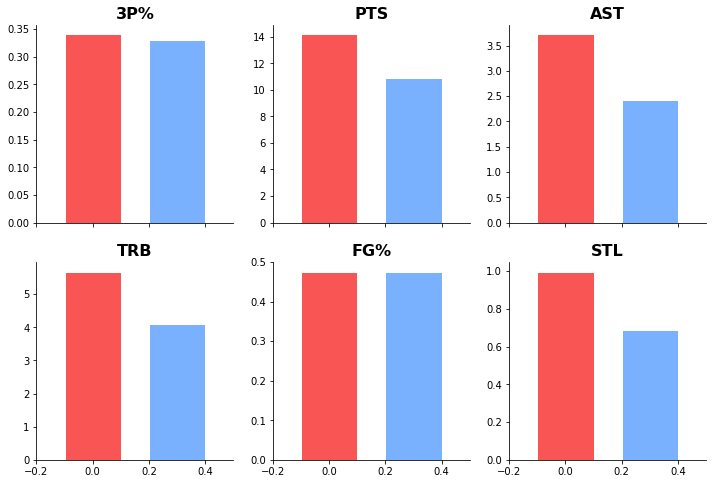

--------- Positions ---------


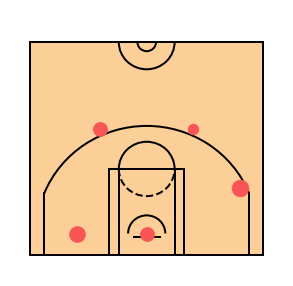

{'PF': 9, 'SF': 9, 'C': 7, 'SG': 4, 'PG': 7, 'SF-SG': 1}
41.827470003648926
--------- Groupe 0 ---------
['Udoka Azubuike', 'Mo Bamba', 'Mo Bamba', 'Charles Bassey', 'Goga Bitadze', 'Bismack Biyombo', 'Moses Brown', 'Moses Brown', 'Dewayne Dedmon', 'Bruno Fernando', 'Wenyen Gabriel', 'Taj Gibson', 'Anthony Gill', 'JaMychal Green', 'Blake Griffin', 'Montrezl Harrell', 'Jaxson Hayes', 'Willy Hernangómez', 'Richaun Holmes', 'Damian Jones', 'Kai Jones', 'DeAndre Jordan', 'Nathan Knight', 'Christian Koloko', 'Luke Kornet', 'Robin Lopez', 'JaVale McGee', 'Chimezie Metu', 'Zeke Nnaji', 'Paul Reed', "Day'Ron Sharpe", 'Jericho Sims', 'Thaddeus Young']
--------- Équipes ---------
{'UTA': 1, 'TOT': 6, 'ORL': 1, 'SAS': 1, 'PHO': 1, 'LAC': 1, 'LAL': 1, 'WAS': 2, 'GSW': 1, 'BOS': 2, 'PHI': 2, 'NOP': 2, 'SAC': 2, 'CHO': 1, 'DEN': 2, 'MIN': 1, 'TOR': 2, 'CLE': 1, 'DAL': 1, 'BRK': 1, 'NYK': 1}
--------- Age ---------
26.939393939393938
--------- Minutes jouées ---------
11.99090909090909
--------- Matc

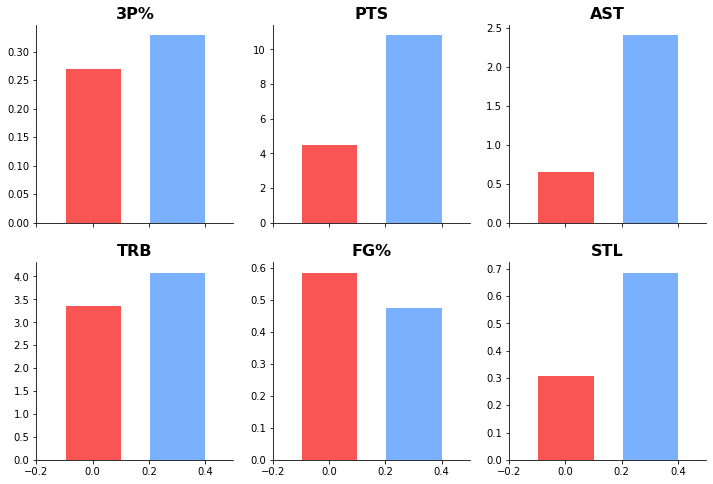

--------- Positions ---------


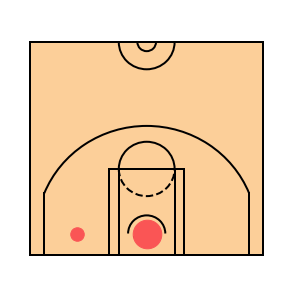

{'C': 27, 'PF': 6}
203.27573747737304
--------- Groupe 3 ---------
['LaMelo Ball', 'Desmond Bane', 'RJ Barrett', 'Bradley Beal', 'Bojan Bogdanović', 'Mikal Bridges', 'Mikal Bridges', 'Jalen Brunson', 'Jordan Clarkson', 'Stephen Curry', 'Spencer Dinwiddie', 'Spencer Dinwiddie', 'Anthony Edwards', "De'Aaron Fox", 'Darius Garland', 'Paul George', 'Jerami Grant', 'Jalen Green', 'Tyrese Haliburton', 'James Harden', 'Tyler Herro', 'Jrue Holiday', 'Kyrie Irving', 'Kyrie Irving', 'Keldon Johnson', 'Kyle Kuzma', 'Zach LaVine', 'Kawhi Leonard', 'Damian Lillard', 'Lauri Markkanen', 'Tyrese Maxey', 'CJ McCollum', 'Donovan Mitchell', 'Dejounte Murray', 'Jamal Murray', 'Kelly Oubre Jr.', 'Jordan Poole', 'Kevin Porter Jr.', 'Terry Rozier', "D'Angelo Russell", "D'Angelo Russell", 'Anfernee Simons', 'Klay Thompson', 'Fred VanVleet', 'Trae Young']
--------- Équipes ---------
{'CHO': 3, 'MEM': 1, 'NYK': 2, 'WAS': 2, 'DET': 1, 'TOT': 4, 'PHO': 1, 'UTA': 2, 'GSW': 3, 'DAL': 1, 'MIN': 2, 'SAC': 1, 'CLE': 2,

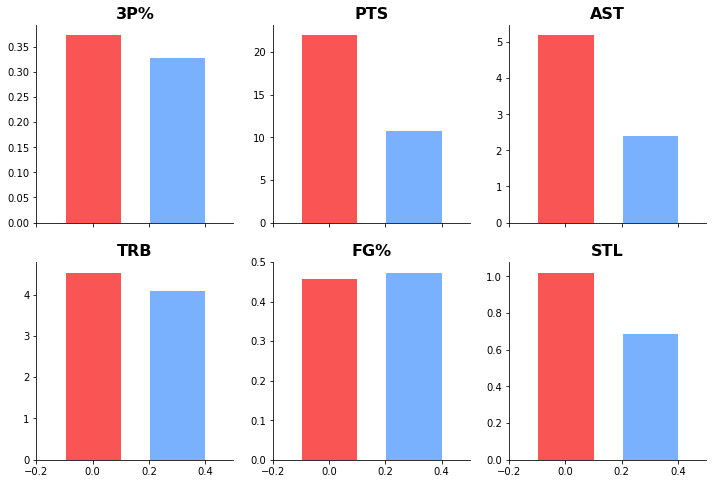

--------- Positions ---------


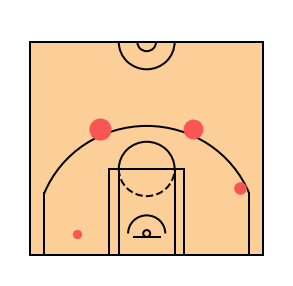

{'PG': 20, 'SG': 16, 'PF': 3, 'SF': 6}


In [69]:
score_groups = {}

for key, val in dico_df_groups.items() :
    
    print((np.mean(val["PTS"])/np.mean(data_33["PTS"]))*100)
    
    print("--------- Groupe {} ---------".format(key))
    
    dico_pos = {}
    positions = pd.unique(val["Pos"])
    for i in positions :
        dico_pos[i] = len(val[val["Pos"]==i])
        
    dico_teams = {}
    teams = pd.unique(val["Tm"])
    for i in teams :
        dico_teams[i] = len(val[val["Tm"]==i])
    
    print(list(val["Player"]))
    print("--------- Équipes ---------")
    print(dico_teams)
    print("--------- Age ---------")
    print(np.mean(val["Age"]))
    print("--------- Minutes jouées ---------")
    print(np.mean(val["MP"]))
    print("--------- Match commencé ---------")
    print(np.mean(val["GS"]))
    print("--------- Statistiques ---------")
    barplots_stats(key)
    print("--------- Positions ---------")
    plot_positions(key)
    print(dico_pos)

## Définir les groupes

In [89]:
dico_grp_GS = {}
dico_grp_MP = {}
for key, val in dico_df_groups.items() :
    dico_grp_GS[key] = np.mean(val["GS"])
    dico_grp_MP[key] = np.mean(val["MP"])

list_grp_GS = sorted(dico_grp_GS.items(), key=lambda x: x[1], reverse = True)
list_grp_MP = sorted(dico_grp_MP.items(), key=lambda x: x[1], reverse = True)

In [90]:
print(list_grp_GS)
print("---------")
print(list_grp_MP)

[(4, 63.68181818181818), (9, 63.5945945945946), (3, 62.17777777777778), (7, 57.84), (8, 49.925925925925924), (6, 26.08), (5, 19.28125), (1, 10.092105263157896), (0, 4.666666666666667), (2, 4.525252525252525)]
---------
[(4, 34.76363636363636), (3, 34.43777777777778), (9, 30.97297297297297), (8, 27.803703703703704), (7, 26.58), (6, 26.284000000000002), (5, 20.956249999999997), (1, 18.126315789473686), (2, 14.771717171717173), (0, 11.99090909090909)]


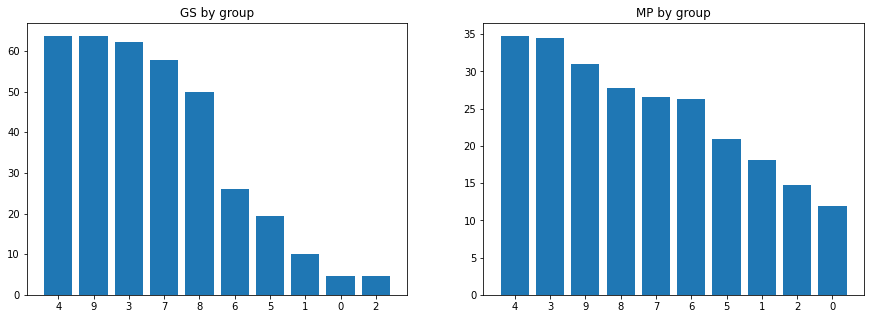

In [91]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar([str(i[0]) for i in list_grp_GS], [i[1] for i in list_grp_GS])
plt.title("GS by group")
plt.subplot(1, 2, 2)
plt.bar([str(i[0]) for i in list_grp_MP], [i[1] for i in list_grp_MP])
plt.title("MP by group")
plt.show()

Here, we can say that groups that have an average number of game started over 30 are in the starting five. Groups with an average number of minutes played over 25 got key players.

In [103]:
group_definition = {}
for key, val in dico_grp_GS.items() :
    group_definition[key] = []
    if val > 30 :
        group_definition[key].append("starter")
    else :
        group_definition[key].append("bench")

for key, val in dico_grp_MP.items() :
    if val > 25 :
        group_definition[key].append("key")

dico_grp_main_pos = {}
for key, val in dico_df_groups.items() :
    dico_pos = {}
    positions = pd.unique(val["Pos"])
    for i in positions :
        dico_pos[i] = (len(val[val["Pos"]==i])/len(val))*100
    pctg = 0
    pos = []
    for k, v in dico_pos.items() :
        if pctg < 50 :
            pctg += v
            pos.append(k)
    group_definition[key].append(pos)

In [104]:
print(group_definition)

{5: ['bench', ['C']], 7: ['starter', 'key', ['C']], 4: ['starter', 'key', ['C', 'PF']], 1: ['bench', ['SG', 'PF']], 2: ['bench', ['SG', 'SF']], 8: ['starter', 'key', ['SG', 'SF']], 6: ['bench', 'key', ['PG', 'SG']], 9: ['starter', 'key', ['PF', 'SF', 'C']], 0: ['bench', ['C']], 3: ['starter', 'key', ['PG', 'SG']]}


## What does teams got ?

In [107]:
dico_teams = {}
for i in data_33["Tm"] :
    dico_teams[i] = []
for key, val in dico_df_groups.items() :
    for i in val["Tm"] :
        dico_teams[i].append(key)

dico_teams_nb_groups = {}
for key, val in dico_teams.items() :
    d = {}
    for i in pd.unique(val) :
        d[i] = 0
    for j in val :
        d[j] += 1
    dico_teams_nb_groups[key] = d

In [110]:
for key, val in dico_teams_nb_groups.items() :
    print("--------- {} ---------".format(key))
    for k, v in val.items() :
        print(v, " ", group_definition[k])

--------- TOR ---------
2   ['bench', ['C']]
1   ['starter', 'key', ['C', 'PF']]
2   ['bench', ['SG', 'SF']]
1   ['bench', 'key', ['PG', 'SG']]
2   ['starter', 'key', ['PF', 'SF', 'C']]
2   ['bench', ['C']]
1   ['starter', 'key', ['PG', 'SG']]
--------- MEM ---------
2   ['bench', ['C']]
1   ['starter', 'key', ['C']]
1   ['starter', 'key', ['C', 'PF']]
4   ['bench', ['SG', 'PF']]
3   ['bench', ['SG', 'SF']]
2   ['starter', 'key', ['PF', 'SF', 'C']]
1   ['starter', 'key', ['PG', 'SG']]
--------- MIA ---------
2   ['starter', 'key', ['C', 'PF']]
2   ['bench', ['SG', 'SF']]
3   ['starter', 'key', ['SG', 'SF']]
2   ['bench', 'key', ['PG', 'SG']]
1   ['starter', 'key', ['PG', 'SG']]
--------- UTA ---------
1   ['bench', ['C']]
2   ['starter', 'key', ['C']]
2   ['bench', ['SG', 'PF']]
3   ['bench', ['SG', 'SF']]
2   ['starter', 'key', ['SG', 'SF']]
4   ['bench', 'key', ['PG', 'SG']]
1   ['starter', 'key', ['PF', 'SF', 'C']]
1   ['bench', ['C']]
2   ['starter', 'key', ['PG', 'SG']]
--------- 

## Wich group make the difference ?

In [111]:
print(dico_teams_nb_groups)

{'TOR': {5: 2, 4: 1, 2: 2, 6: 1, 9: 2, 0: 2, 3: 1}, 'MEM': {5: 2, 7: 1, 4: 1, 1: 4, 2: 3, 9: 2, 3: 1}, 'MIA': {4: 2, 2: 2, 8: 3, 6: 2, 3: 1}, 'UTA': {5: 1, 7: 2, 1: 2, 2: 3, 8: 2, 6: 4, 9: 1, 0: 1, 3: 2}, 'TOT': {5: 3, 7: 3, 4: 1, 1: 12, 2: 27, 8: 8, 6: 13, 9: 3, 0: 6, 3: 4}, 'MIL': {5: 1, 4: 1, 1: 2, 2: 7, 8: 2, 9: 1, 3: 1}, 'CLE': {7: 2, 1: 3, 2: 3, 8: 2, 0: 1, 3: 2}, 'NOP': {5: 1, 7: 1, 4: 1, 1: 3, 2: 1, 8: 1, 6: 1, 9: 1, 0: 2, 3: 1}, 'MIN': {5: 1, 7: 1, 1: 2, 2: 2, 9: 2, 0: 1, 3: 2}, 'ORL': {5: 2, 4: 1, 1: 1, 2: 4, 6: 3, 9: 3, 0: 1}, 'WAS': {7: 1, 4: 1, 1: 1, 2: 1, 8: 3, 6: 1, 0: 2, 3: 2}, 'PHO': {7: 1, 4: 1, 1: 5, 2: 2, 8: 1, 6: 1, 9: 2, 0: 1, 3: 1}, 'DET': {5: 2, 7: 1, 1: 3, 2: 1, 8: 1, 6: 2, 9: 3, 3: 1}, 'CHO': {5: 2, 7: 1, 1: 1, 2: 3, 8: 1, 6: 3, 9: 1, 0: 1, 3: 3}, 'SAC': {4: 1, 1: 3, 2: 1, 8: 3, 6: 1, 0: 2, 3: 1}, 'NYK': {5: 1, 7: 1, 4: 1, 1: 1, 2: 1, 8: 2, 0: 1, 3: 2}, 'SAS': {5: 1, 7: 1, 1: 3, 2: 3, 6: 2, 9: 2, 0: 1, 3: 1}, 'LAC': {7: 1, 1: 2, 2: 3, 8: 3, 6: 3, 0: 1, 3: 2}, 

In [112]:
dico_df_tm_grp = {}
dico_df_tm_grp["Team"] = []
for i in range(10) :
    dico_df_tm_grp[i] = []

In [114]:
for key, val in dico_teams_nb_groups.items() :
    dico_df_tm_grp["Team"].append(key)
    for i in range(10) :
        if i in val.keys() :
            dico_df_tm_grp[i].append(val[i])
        else :
            dico_df_tm_grp[i].append(0)

In [115]:
print(dico_df_tm_grp)

{'Team': ['TOR', 'MEM', 'MIA', 'UTA', 'TOT', 'MIL', 'CLE', 'NOP', 'MIN', 'ORL', 'WAS', 'PHO', 'DET', 'CHO', 'SAC', 'NYK', 'SAS', 'LAC', 'OKC', 'DAL', 'LAL', 'ATL', 'DEN', 'IND', 'BOS', 'CHI', 'HOU', 'BRK', 'GSW', 'PHI', 'POR'], 0: [2, 0, 0, 1, 6, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0], 1: [0, 4, 0, 2, 12, 2, 3, 3, 2, 1, 1, 5, 3, 1, 3, 1, 3, 2, 5, 0, 1, 2, 3, 2, 1, 2, 2, 4, 2, 3, 1], 2: [2, 3, 2, 3, 27, 7, 3, 1, 2, 4, 1, 2, 1, 3, 1, 1, 3, 3, 5, 5, 2, 1, 2, 1, 1, 2, 2, 2, 1, 3, 3], 3: [1, 1, 1, 2, 4, 1, 2, 1, 2, 0, 2, 1, 1, 3, 1, 2, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 3, 2, 3], 4: [1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0], 5: [2, 2, 0, 1, 3, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 2], 6: [1, 0, 2, 4, 13, 0, 0, 1, 0, 3, 1, 1, 2, 3, 1, 0, 2, 3, 1, 1, 5, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0], 7: [0, 1, 0, 2, 3, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1

In [146]:
data_standings = pd.read_csv("data/nba_rk_2223.csv")

In [147]:
equipes_nba = {
    'Atlanta Hawks': 'ATL',
    'Boston Celtics': 'BOS',
    'Brooklyn Nets': 'BKN',
    'Charlotte Hornets': 'CHA',
    'Chicago Bulls': 'CHI',
    'Cleveland Cavaliers': 'CLE',
    'Dallas Mavericks': 'DAL',
    'Denver Nuggets': 'DEN',
    'Detroit Pistons': 'DET',
    'Golden State Warriors': 'GSW',
    'Houston Rockets': 'HOU',
    'Indiana Pacers': 'IND',
    'LA Clippers': 'LAC',
    'Los Angeles Lakers': 'LAL',
    'Memphis Grizzlies': 'MEM',
    'Miami Heat': 'MIA',
    'Milwaukee Bucks': 'MIL',
    'Minnesota Timberwolves': 'MIN',
    'New Orleans Pelicans': 'NOP',
    'New York Knicks': 'NYK',
    'Oklahoma City Thunder': 'OKC',
    'Orlando Magic': 'ORL',
    'Philadelphia 76ers': 'PHI',
    'Phoenix Suns': 'PHX',
    'Portland Trail Blazers': 'POR',
    'Sacramento Kings': 'SAC',
    'San Antonio Spurs': 'SAS',
    'Toronto Raptors': 'TOR',
    'Utah Jazz': 'UTA',
    'Washington Wizards': 'WAS'
}

In [148]:
df_team_names = pd.DataFrame({'Team' : equipes_nba.keys(), "Tm" : equipes_nba.values()})

In [149]:
data_standings = pd.merge(data_standings, df_team_names, on = "Team")

In [151]:
data_standings["Overall"] = [int(i.split("-")[0])/82 for i in data_standings["Overall"]]

In [152]:
data_standings = data_standings.loc[:,["Tm", "Overall"]]

In [154]:
data_standings.columns = ["Team", "Reccord"]

In [155]:
data_teams_grp = pd.DataFrame(dico_df_tm_grp)

In [156]:
data_teams_grp = data_teams_grp[data_teams_grp["Team"] != "TOT"]

In [157]:
data_teams_grp = pd.merge(data_teams_grp, data_standings, on = "Team")

In [159]:
data_teams_grp = data_teams_grp.set_index("Team")

In [160]:
data_teams_grp

,0,1,2,3,4,5,6,7,8,9,Reccord
Team,,,,,,,,,,,
TOR,2,0,2,1,1,2,1,0,0,2,0.500000
MEM,0,4,3,1,1,2,0,1,0,2,0.621951
MIA,0,0,2,1,2,0,2,0,3,0,0.536585
UTA,1,2,3,2,0,1,4,2,2,1,0.451220
MIL,0,2,7,1,1,1,0,0,2,1,0.707317
CLE,1,3,3,2,0,0,0,2,2,0,0.621951
NOP,2,3,1,1,1,1,1,1,1,1,0.512195
MIN,1,2,2,2,0,1,0,1,0,2,0.512195
ORL,1,1,4,0,1,2,3,0,0,3,0.414634


In [161]:
mat_corr = data_teams_grp.corr()

In [162]:
mat_corr

,0,1,2,3,4,5,6,7,8,9,Reccord
0,1.000000,-0.119254,-0.284255,-0.063013,0.308130,-0.499500,0.057068,-0.002998,0.261387,-0.283073,0.342659
1,-0.119254,1.000000,0.106363,-0.077472,-0.291942,-0.125818,-0.206793,0.051597,-0.261574,0.380111,0.043898
2,-0.284255,0.106363,1.000000,-0.221595,0.066562,0.190372,-0.053042,-0.147586,-0.156144,0.169748,0.159292
3,-0.063013,-0.077472,-0.221595,1.000000,-0.633573,-0.018995,-0.389268,0.514119,-0.127355,-0.332575,-0.091953
4,0.308130,-0.291942,0.066562,-0.633573,1.000000,-0.366844,0.194853,-0.517373,0.424117,-0.233452,0.509066
5,-0.499500,-0.125818,0.190372,-0.018995,-0.366844,1.000000,0.076053,0.028464,-0.522688,0.485046,-0.560249
6,0.057068,-0.206793,-0.053042,-0.389268,0.194853,0.076053,1.000000,-0.031189,0.021741,0.177546,-0.327894
7,-0.002998,0.051597,-0.147586,0.514119,-0.517373,0.028464,-0.031189,1.000000,-0.161751,-0.153748,-0.196495
8,0.261387,-0.261574,-0.156144,-0.127355,0.424117,-0.522688,0.021741,-0.161751,1.000000,-0.745078,0.344032
9,-0.283073,0.380111,0.169748,-0.332575,-0.233452,0.485046,0.177546,-0.153748,-0.745078,1.000000,-0.368816


# Classement des groupes

In [25]:
score_groups = {}

for key, val in dico_df_groups.items() :
    vals = []
    for stat in ["3P%", "PTS", "AST", "TRB", "FG%", "STL"] :
        vals.append((np.mean(val["PTS"])-np.mean(data_33["PTS"])))
    score_groups[key] = [np.mean(vals)]
    
score_groups_sorted = sorted(score_groups.items(), key=lambda x: x[1], reverse = True)

In [26]:
print(score_groups_sorted)

[(4, [15.544638694638698]), (3, [11.215648795648795]), (9, [3.3184716184716136]), (6, [1.2080932400932394]), (7, [0.1480932400932371]), (8, [-0.2358326858326869]), (5, [-1.3942817599067627]), (1, [-3.7112225493804476]), (2, [-5.626573426573429]), (0, [-6.317482517482518])]


In [27]:
for tpl in score_groups_sorted :
    print("---------- {} ----------".format(tpl[0]))
    print("Score :",tpl[1])
    print(dico_df_groups[tpl[0]]["Player"])

---------- 4 ----------
Score : [15.544638694638698]
2                  Bam Adebayo
12       Giannis Antetokounmpo
28              Paolo Banchero
66                Devin Booker
85                Jaylen Brown
100               Jimmy Butler
141              Anthony Davis
150              DeMar DeRozan
160                Luka Dončić
174               Kevin Durant
175               Kevin Durant
184                Joel Embiid
209    Shai Gilgeous-Alexander
292             Brandon Ingram
306               LeBron James
318               Nikola Jokić
435                  Ja Morant
502         Kristaps Porziņģis
514              Julius Randle
549           Domantas Sabonis
565              Pascal Siakam
590               Jayson Tatum
Name: Player, dtype: object
---------- 3 ----------
Score : [11.215648795648795]
24           LaMelo Ball
29          Desmond Bane
34            RJ Barrett
44          Bradley Beal
63      Bojan Bogdanović
77         Mikal Bridges
78         Mikal Bridges
92       

In [28]:
dico_df_sorted = {}
for i in range(len(score_groups_sorted)) :
    dico_df_sorted[i+1] = dico_df_groups[score_groups_sorted[i][0]]

In [29]:
print(dico_df_sorted)

{1:       Rk                   Player    Pos  Age   Tm   G  GS    MP    FG   FGA  \
2      3              Bam Adebayo      C   25  MIA  75  75  34.6   8.0  14.9   
12    11    Giannis Antetokounmpo     PF   28  MIL  63  63  32.1  11.2  20.3   
28    23           Paolo Banchero     PF   20  ORL  72  72  33.8   6.7  15.6   
66    49             Devin Booker     SG   26  PHO  53  53  34.6   9.9  20.1   
85    64             Jaylen Brown     SF   26  BOS  67  67  35.9  10.1  20.6   
100   75             Jimmy Butler     SF   33  MIA  64  64  33.4   7.5  13.9   
141  110            Anthony Davis      C   29  LAL  56  54  34.0   9.7  17.2   
150  117            DeMar DeRozan     SF   33  CHI  74  74  36.2   8.9  17.6   
160  125              Luka Dončić     PG   23  DAL  66  66  36.2  10.9  22.0   
174  137             Kevin Durant  PF-SF   34  TOT  47  47  35.6  10.3  18.3   
175  137             Kevin Durant     PF   34  BRK  39  39  36.0  10.5  18.8   
184  143              Joel Embiid   

## Groupe moyen pour chaque équipe

In [30]:
dico_mean_group_team = {}
for i in data_33["Tm"] :
    dico_mean_group_team[i] = []

for key, val in dico_df_sorted.items() :
    for i in val["Tm"] :
        dico_mean_group_team[i].append(key)

In [31]:
dico_mean_group_team

{'TOR': [1, 2, 3, 3, 4, 7, 7, 9, 9, 10, 10],
 'MEM': [1, 2, 3, 3, 5, 7, 7, 8, 8, 8, 8, 9, 9, 9],
 'MIA': [1, 1, 2, 4, 4, 6, 6, 6, 9, 9],
 'UTA': [2, 2, 3, 4, 4, 4, 4, 5, 5, 6, 6, 7, 8, 8, 9, 9, 9, 10],
 'TOT': [1,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  7,
  7,
  7,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  10,
  10,
  10,
  10,
  10,
  10],
 'MIL': [1, 2, 3, 6, 6, 7, 8, 8, 9, 9, 9, 9, 9, 9, 9],
 'CLE': [2, 2, 5, 5, 6, 6, 8, 8, 8, 9, 9, 9, 10],
 'NOP': [1, 2, 3, 4, 5, 6, 7, 8, 8, 8, 9, 10, 10],
 'MIN': [2, 2, 3, 3, 5, 7, 8, 8, 9, 9, 10],
 'ORL': [1, 3, 3, 3, 4, 4, 4, 7, 7, 8, 9, 9, 9, 9, 10],
 'WAS': [1, 2, 2, 4, 5, 6, 6, 6, 8, 9, 10, 10],
 'PHO': [1, 2, 3, 3, 4, 5, 6, 8, 8, 8, 8, 8, 9, 9, 10],
 'DET': [2, 3, 3, 3, 4, 

In [32]:
for key, val in dico_mean_group_team.items() :
    dico_mean_group_team[key] = (np.mean(val), np.std(val))

In [33]:
dico_mean_group_team_sorted = sorted(dico_mean_group_team.items(), key=lambda x: x[1][0])

In [34]:
dico_mean_group_team_sorted

[('MIA', (4.8, 2.7856776554368237)),
 ('ATL', (5.1, 2.5475478405713994)),
 ('LAL', (5.333333333333333, 2.7243755655603397)),
 ('DET', (5.5, 2.2598988599366248)),
 ('GSW', (5.5, 2.7838821814150108)),
 ('NYK', (5.6, 2.9393876913398134)),
 ('CHO', (5.6875, 2.7092146002116553)),
 ('POR', (5.7272727272727275, 2.86327559054975)),
 ('WAS', (5.75, 2.9755951785595207)),
 ('BOS', (5.75, 3.003470215156683)),
 ('UTA', (5.833333333333333, 2.4776781245530843)),
 ('HOU', (5.833333333333333, 2.4776781245530843)),
 ('TOR', (5.909090909090909, 3.232070697205669)),
 ('CHI', (5.909090909090909, 2.644189013136179)),
 ('MIN', (6.0, 2.9232609437842774)),
 ('ORL', (6.0, 2.851899951494325)),
 ('IND', (6.0, 2.088931871468374)),
 ('PHO', (6.133333333333334, 2.8015868519267593)),
 ('LAC', (6.133333333333334, 2.5263060428661888)),
 ('MEM', (6.214285714285714, 2.7302164076594844)),
 ('NOP', (6.230769230769231, 2.8864096983528795)),
 ('SAS', (6.357142857142857, 2.635123820813817)),
 ('DEN', (6.428571428571429, 2.846